In [2]:
import pandas as pand
import numpy as num
from matplotlib import pyplot as plot
%matplotlib inline
import seaborn as sea
sea.set_style('darkgrid')
from collections import Counter
import os

In [4]:
data_frame = pand.read_csv(os.path.join("../Resources", "Churn_Modelling.csv"))
print(f"Dataframe dimensions: {data_frame.shape}")
data_frame.head()

Dataframe dimensions: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data_frame.CustomerId.nunique()

10000

In [7]:
data_frame.duplicated().sum()

0

In [8]:
data_frame.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(f"Dataframe dimensions: {data_frame.shape}")
data_frame.head()

Dataframe dimensions: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


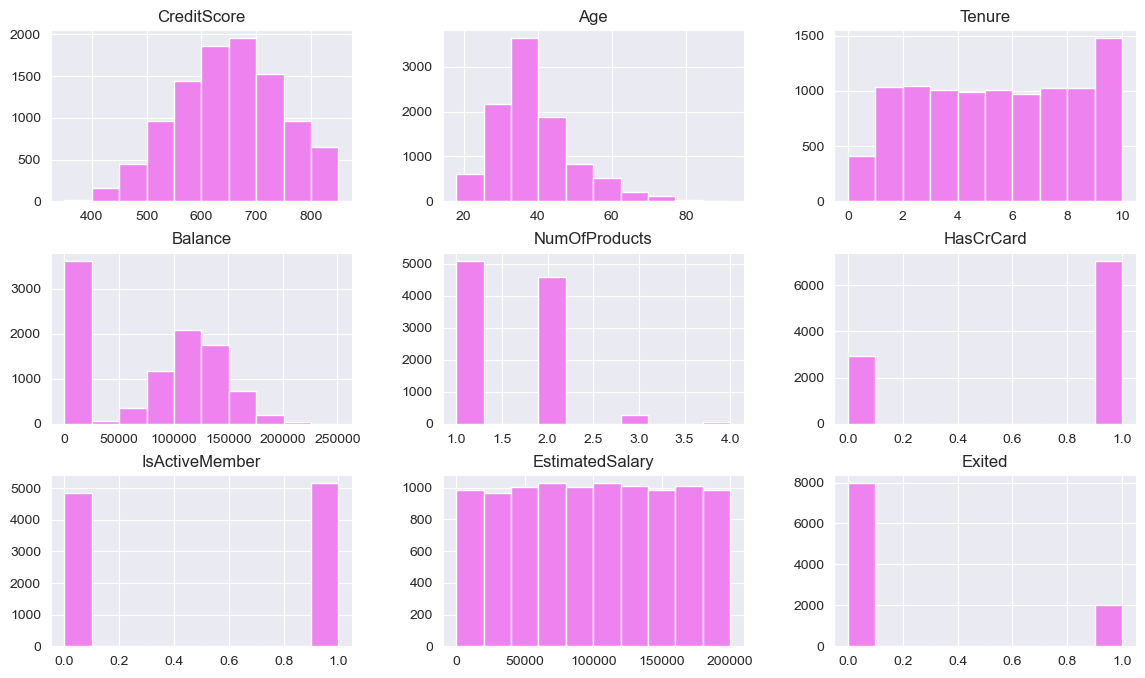

In [9]:
# Visulaisation with histogram
data_frame.hist(figsize=(14,8),color='violet')

plot.show()

In [10]:
data_frame.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
data_frame.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


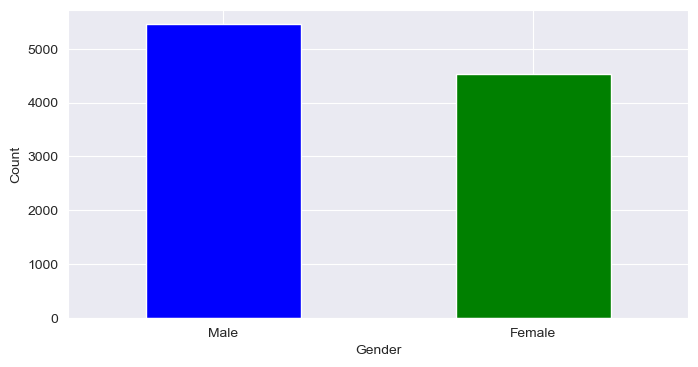

Counter({'Female': 4543, 'Male': 5457})

In [12]:
# Visualisation for "Gender"
plot.figure(figsize=(8,4))
data_frame['Gender'].value_counts().plot.bar(color=['b', 'g'])
plot.ylabel('Count')
plot.xlabel('Gender')
plot.xticks(rotation=0)
plot.show()
Counter(data_frame.Gender)

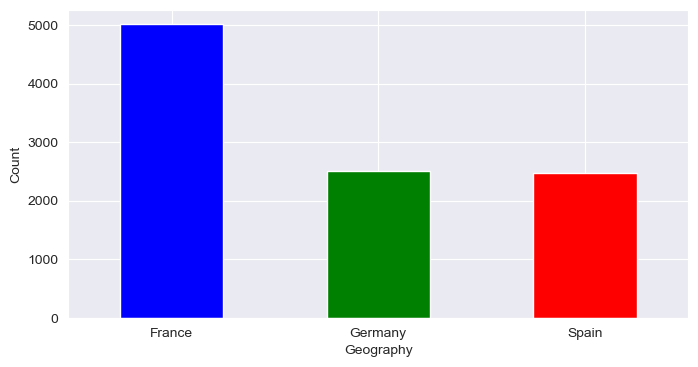

Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})

In [13]:
# Visualisation for "Geography"
plot.figure(figsize=(8,4))
data_frame['Geography'].value_counts().plot.bar(color=['b', 'g', 'r'])
plot.ylabel('Count')
plot.xlabel('Geography')
plot.xticks(rotation=0)
plot.show()
Counter(data_frame.Geography)

In [14]:
grouped_data = data_frame.groupby('Gender')['Exited'].agg(Count='value_counts')
grouped_data

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [15]:
dataframe_gc = grouped_data
dataframe_gc = dataframe_gc.pivot_table(values='Count', index='Gender', columns=['Exited'])
dataframe_gc

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [16]:
# Calculate percentage within each class
dataframe_gp = grouped_data.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dataframe_gp.rename(columns={'Count': 'Percentage'}, inplace=True)
dataframe_gp = dataframe_gp.pivot_table(values='Percentage', index='Gender', columns=['Exited'])
dataframe_gp

/var/folders/l6/yb0jktmd6jn95ty4crp395kc0000gn/T/ipykernel_9502/72319188.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dataframe_gp = grouped_data.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))


Exited,0,1
Gender,,
Female,74.93,25.07
Male,83.54,16.46


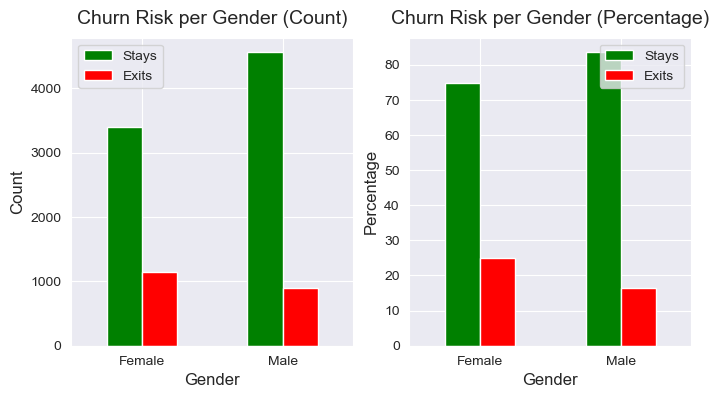

In [17]:
# Churn Distribution by gender, count + percentage

labels= ['Stays', 'Exits']

fig, (x1, x2) = plot.subplots(1, 2, figsize=(8, 4))

dataframe_gc.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=x1)
x1.legend(labels)
x1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
x1.set_ylabel('Count',size=12)
x1.set_xlabel('Gender', size=12)


dataframe_gp.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=x2)
x2.legend(labels)
x2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
x2.set_ylabel('Percentage',size=12)
x2.set_xlabel('Gender', size=12)

plot.show()

In [18]:
#"Exited" by geography 
grouped_data2 = data_frame.groupby('Geography')['Exited'].agg(Count='value_counts')
grouped_data2

Count
Geography Exited       
France    0        4204
          1         810
Germany   0        1695
          1         814
Spain     0        2064
          1         413

In [19]:
# Modifying dataframe for plotting count
df_geoc = grouped_data2
df_geoc = df_geoc.pivot_table(values='Count', index='Geography', columns=['Exited'])
df_geoc

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [20]:
# Calculate percentage within each class
df_geop = grouped_data2.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
df_geop.rename(columns={'Count': 'Percentage'}, inplace=True)
df_geop = df_geop.pivot_table(values='Percentage', index='Geography', columns=['Exited'])
df_geop

/var/folders/l6/yb0jktmd6jn95ty4crp395kc0000gn/T/ipykernel_9502/4284321256.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_geop = grouped_data2.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))


Exited,0,1
Geography,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67


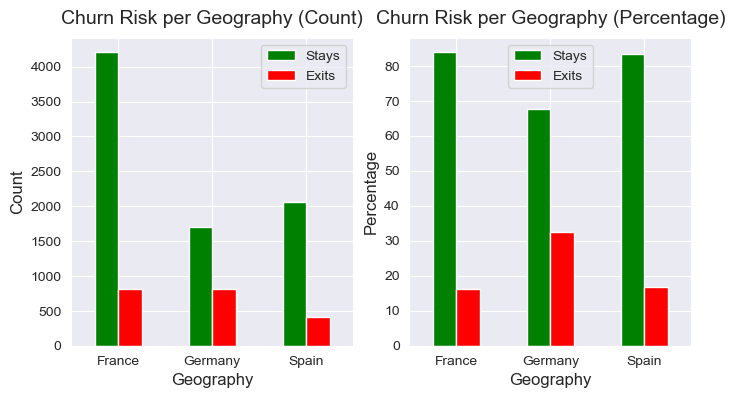

In [21]:
# Finding churn disturbution by geography count and percentage
labels= ['Stays', 'Exits']

fig, (x1, x2) = plot.subplots(1, 2, figsize=(8, 4))

df_geoc.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=x1)
x1.legend(labels)
x1.set_title('Churn Risk per Geography (Count)', fontsize=14, pad=10)
x1.set_ylabel('Count',size=12)
x1.set_xlabel('Geography', size=12)


df_geop.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=x2)
x2.legend(labels)
x2.set_title('Churn Risk per Geography (Percentage)', fontsize=14, pad=10)
x2.set_ylabel('Percentage',size=12)
x2.set_xlabel('Geography', size=12)

plot.show()

In [22]:
# Calculate correlations and sorting them
correlations_data = data_frame.corr()
sort_correlations_data = correlations_data.Exited.sort_values(ascending=False).keys()
sort_correlations = correlations_data.loc[sort_correlations_data,sort_correlations_data]
sort_correlations

/var/folders/l6/yb0jktmd6jn95ty4crp395kc0000gn/T/ipykernel_9502/1869703856.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_data = data_frame.corr()


,Exited,Age,Balance,EstimatedSalary,HasCrCard,Tenure,CreditScore,NumOfProducts,IsActiveMember
Exited,1.000000,0.285323,0.118533,0.012097,-0.007138,-0.014001,-0.027094,-0.047820,-0.156128
Age,0.285323,1.000000,0.028308,-0.007201,-0.011721,-0.009997,-0.003965,-0.030680,0.085472
Balance,0.118533,0.028308,1.000000,0.012797,-0.014858,-0.012254,0.006268,-0.304180,-0.010084
EstimatedSalary,0.012097,-0.007201,0.012797,1.000000,-0.009933,0.007784,-0.001384,0.014204,-0.011421
HasCrCard,-0.007138,-0.011721,-0.014858,-0.009933,1.000000,0.022583,-0.005458,0.003183,-0.011866
Tenure,-0.014001,-0.009997,-0.012254,0.007784,0.022583,1.000000,0.000842,0.013444,-0.028362
CreditScore,-0.027094,-0.003965,0.006268,-0.001384,-0.005458,0.000842,1.000000,0.012238,0.025651
NumOfProducts,-0.047820,-0.030680,-0.304180,0.014204,0.003183,0.013444,0.012238,1.000000,0.009612
IsActiveMember,-0.156128,0.085472,-0.010084,-0.011421,-0.011866,-0.028362,0.025651,0.009612,1.000000


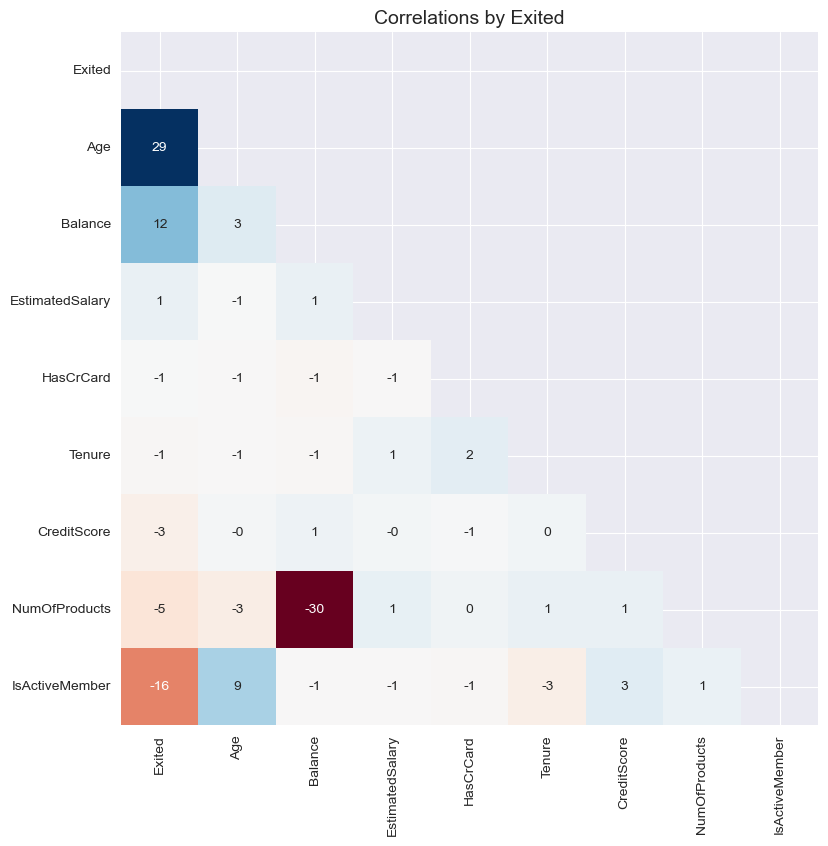

In [33]:
# Plot heatmap Visualisation
correlation_mask = num.zeros_like(correlations_data)
correlation_mask[num.triu_indices_from(correlation_mask)] = 1

plot.figure(figsize=(9,9))
sea.heatmap(sort_correlations*100, 
                cmap='RdBu', 
                annot=True,
                fmt='.0f',
                mask=correlation_mask,
                cbar=False)
    
plot.title('Correlations by Exited', fontsize=14)
plot.yticks(rotation=0)
plot.show()

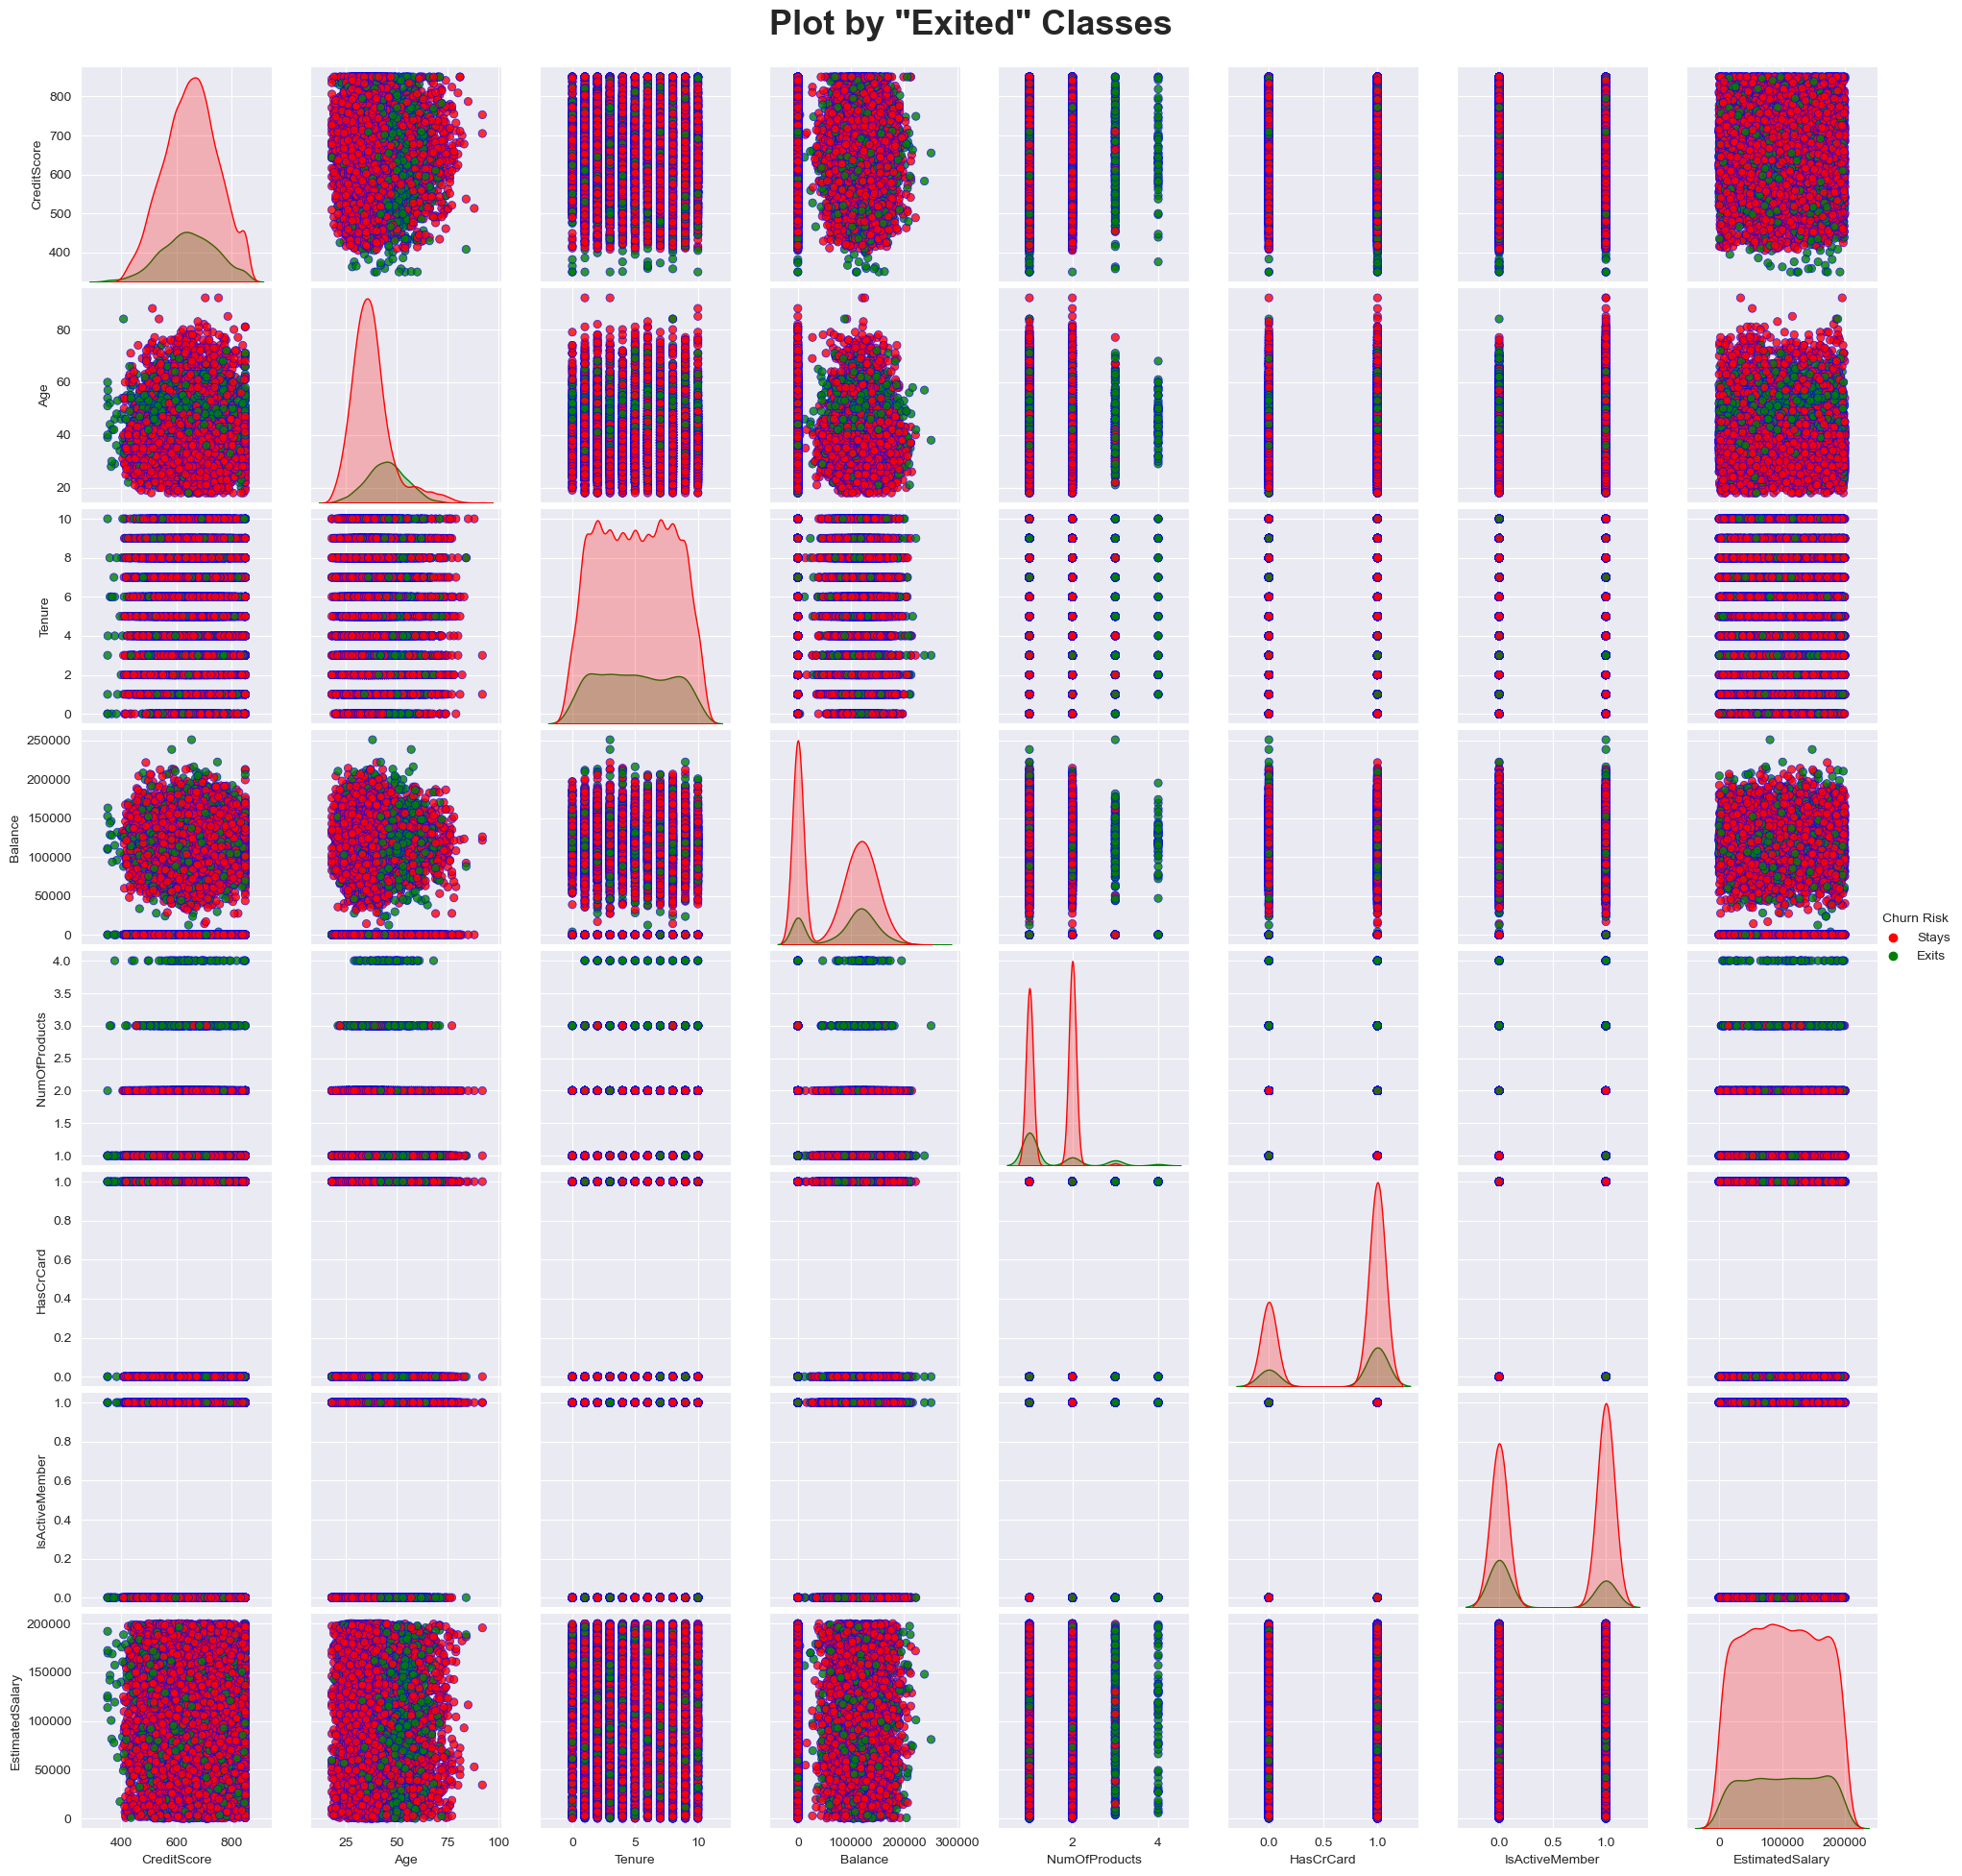

In [34]:
# Visualisation 
pp = sea.pairplot(data_frame, hue='Exited',
                 palette={1 : 'green',
                          0 : 'red'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

figure = pp.fig
figure.subplots_adjust(top=0.95, wspace=0.2)
figure.suptitle('Plot by "Exited" Classes',
             fontsize=26,
             fontweight='bold')

new_title = 'Churn Risk'
pp._legend.set_title(new_title)
new_labels = ['Stays', 'Exits']
for t, l in zip(pp._legend.texts, new_labels): t.set_text(l)

plot.show()

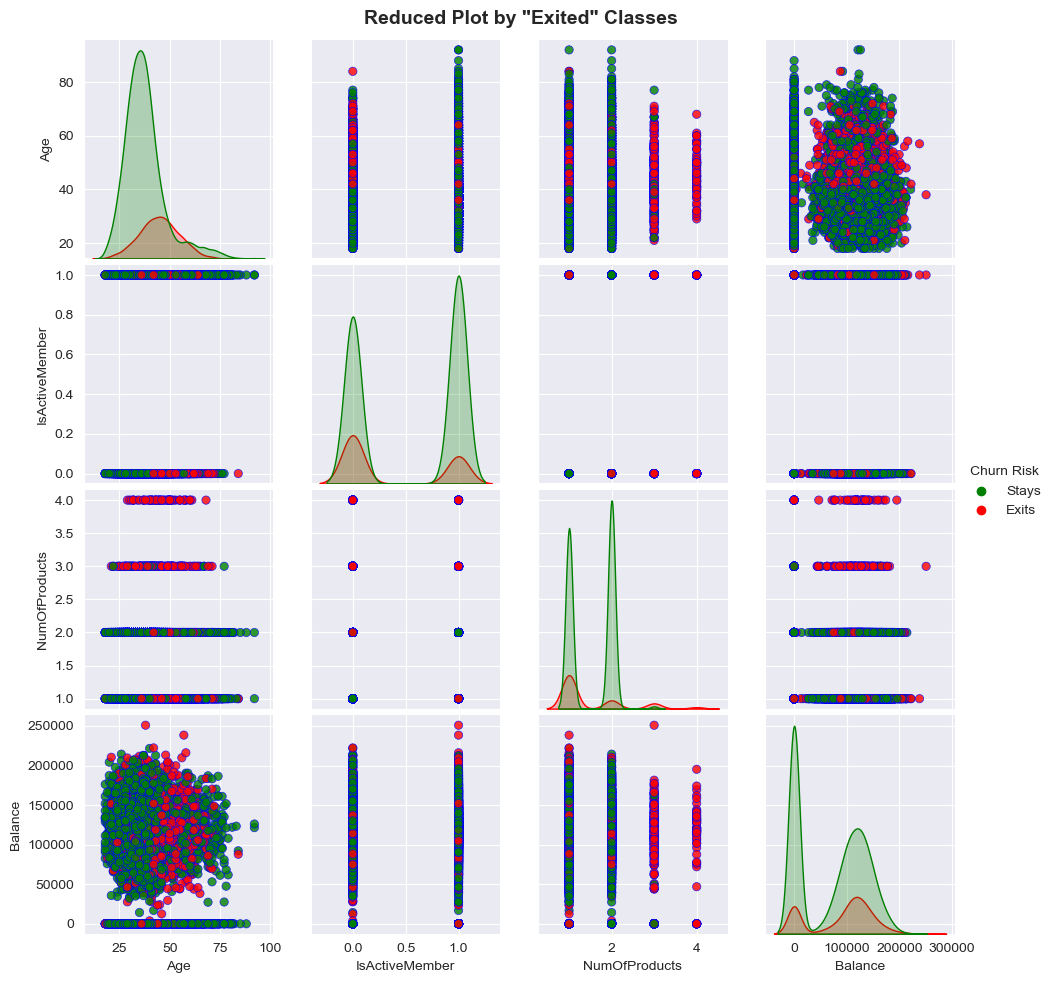

In [35]:
# Visulatison with  pairplot2
pp1 = sea.pairplot(data_frame, hue='Exited',
                 vars=['Age', 'IsActiveMember', 'NumOfProducts', 'Balance'], 
                 palette={0 : 'green',
                          1 : 'red'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

figure2 = pp1.fig
figure2.subplots_adjust(top=0.95, wspace=0.2)
figure2.suptitle('Reduced Plot by "Exited" Classes',
             fontsize=14,
             fontweight='bold')

new_title = 'Churn Risk'
pp1._legend.set_title(new_title)
new_labels = ['Stays', 'Exits']
for t, l in zip(pp1._legend.texts, new_labels): t.set_text(l)

plot.show()

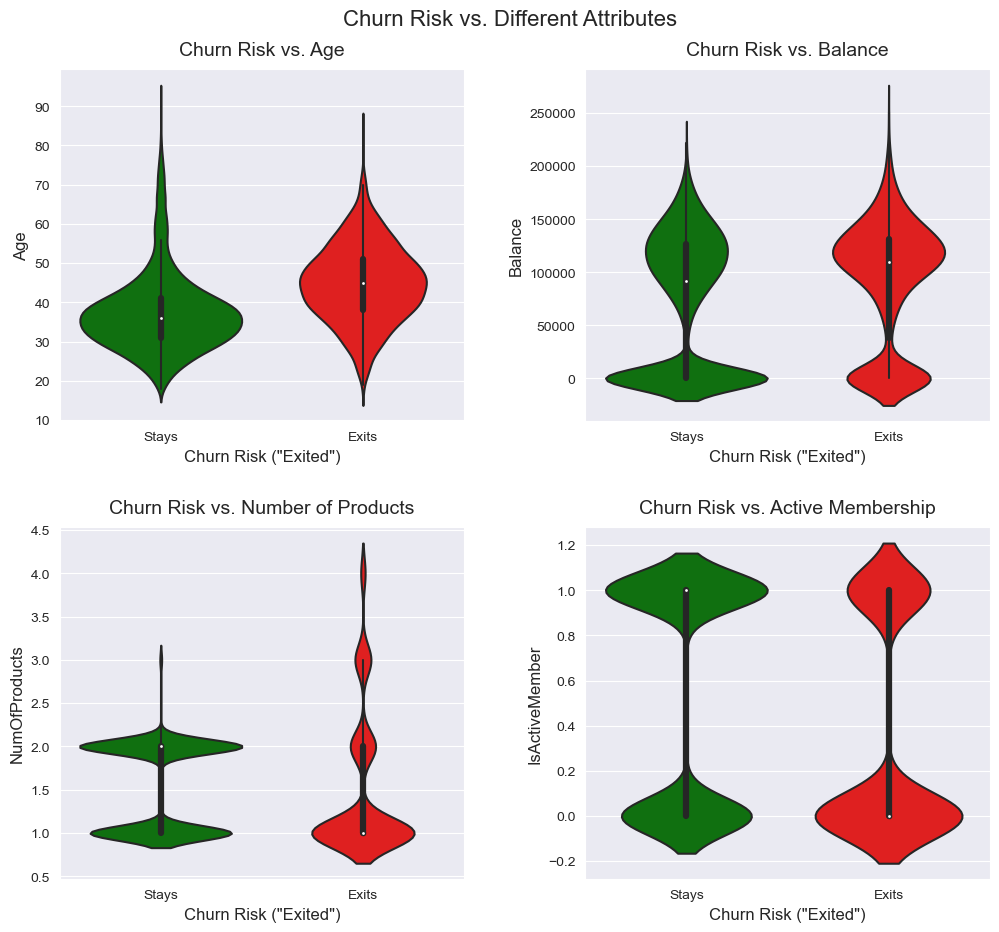

In [36]:
my_col = {'Stays': 'green', 'Exits': 'red'}
tar = {0: 'Stays', 1: 'Exits'}
exit = data_frame['Exited'].map(tar)

fig, ((x1, x2), (x3, x4)) = plot.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Churn Risk vs. Different Attributes', fontsize=16)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

sea.violinplot(x=exit,
               y=data_frame['Age'],
               order=['Stays', 'Exits'], 
               palette=my_col,
               ax=x1)

x1.set_title('Churn Risk vs. Age', fontsize=14, pad=10)
x1.set_ylabel('Age',size=12)
x1.set_xlabel('Churn Risk ("Exited")', size=12)

sea.violinplot(x=exit,
               y=data_frame['Balance'],
               order=['Stays', 'Exits'], 
               palette=my_col,
               ax=x2)

x2.set_title('Churn Risk vs. Balance', fontsize=14, pad=10)
x2.set_ylabel('Balance',size=12)
x2.set_xlabel('Churn Risk ("Exited")', size=12)

sea.violinplot(x=exit,
               y=data_frame['NumOfProducts'],
               order=['Stays', 'Exits'], 
               palette=my_col,
               ax=x3)

x3.set_title('Churn Risk vs. Number of Products', fontsize=14, pad=10)
x3.set_ylabel('NumOfProducts',size=12)
x3.set_xlabel('Churn Risk ("Exited")', size=12)

sea.violinplot(x=exit,
               y=data_frame['IsActiveMember'],
               order=['Stays', 'Exits'], 
               palette=my_col,
               ax=x4)

x4.set_title('Churn Risk vs. Active Membership', fontsize=14, pad=10)
x4.set_ylabel('IsActiveMember',size=12)
x4.set_xlabel('Churn Risk ("Exited")', size=12)
plot.show()

In [37]:
#target variable
y = data_frame.Exited
y.shape

(10000,)

In [38]:
def class_count(a):
    
    counter = Counter(a)
    
    result_df = pand.DataFrame({
        'Exited': list(counter.keys()),
        'Count': list(counter.values())
    })

    
    result_df['Count'] = result_df['Count'].astype('int64')
    result_df['%'] = round(result_df['Count'] / len(a) * 100, 2)

   
    result_df.sort_values('Count', ascending=False, inplace=True)

    return result_df



In [39]:
# calling the function
df_cc = class_count(y)
df_cc

,Exited,Count,%
1,0,7963,79.63
0,1,2037,20.37


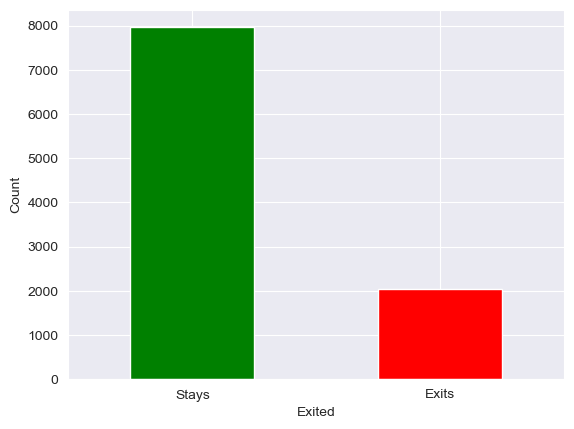

In [40]:
# Visualisation for the target variable
labels=['Stays', 'Exits']
df_cc.plot.bar(x='Exited', y='Count', color=['g', 'r'], legend=False)
plot.xticks(df_cc['Exited'], labels, rotation=0)
plot.ylabel('Count')
plot.show()

In [41]:
data_frame.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
